In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


In [2]:
df = pd.read_csv("../input/house-rent-prediction-dataset/House_Rent_Dataset.csv")

In [3]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [4]:
df.drop("Posted On", axis=1, inplace=True)

In [5]:
df.drop("Point of Contact", axis=1, inplace=True)

In [6]:
df["City"].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [7]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1


In [8]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [9]:
df.drop("Area Locality", axis=1, inplace=True)

In [10]:
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1


In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["Furnishing Status"] = label_encoder.fit_transform(df["Furnishing Status"])

In [12]:
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,2,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,1,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Kolkata,1,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Kolkata,2,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,2,Bachelors,1


In [13]:
df["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [14]:
df["Area Type"] = label_encoder.fit_transform(df["Area Type"])

In [15]:
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,2,Kolkata,2,Bachelors/Family,2
1,2,20000,800,1 out of 3,2,Kolkata,1,Bachelors/Family,1
2,2,17000,1000,1 out of 3,2,Kolkata,1,Bachelors/Family,1
3,2,10000,800,1 out of 2,2,Kolkata,2,Bachelors/Family,1
4,2,7500,850,1 out of 2,1,Kolkata,2,Bachelors,1


In [16]:
df['City']

0         Kolkata
1         Kolkata
2         Kolkata
3         Kolkata
4         Kolkata
          ...    
4741    Hyderabad
4742    Hyderabad
4743    Hyderabad
4744    Hyderabad
4745    Hyderabad
Name: City, Length: 4746, dtype: object

In [17]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
#reshape the 1-D city array to 2-D as fit_transform expects 2-D and finally fit the object 
x = pd.DataFrame(onehotencoder.fit_transform(df[['City']]).toarray())
 
df = df.join(x)

In [18]:
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,0,1,2,3,4,5
0,2,10000,1100,Ground out of 2,2,Kolkata,2,Bachelors/Family,2,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20000,800,1 out of 3,2,Kolkata,1,Bachelors/Family,1,0.0,0.0,0.0,0.0,1.0,0.0
2,2,17000,1000,1 out of 3,2,Kolkata,1,Bachelors/Family,1,0.0,0.0,0.0,0.0,1.0,0.0
3,2,10000,800,1 out of 2,2,Kolkata,2,Bachelors/Family,1,0.0,0.0,0.0,0.0,1.0,0.0
4,2,7500,850,1 out of 2,1,Kolkata,2,Bachelors,1,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
df.drop("City", axis=1, inplace=True)

In [20]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Furnishing Status,Tenant Preferred,Bathroom,0,1,2,3,4,5
0,2,10000,1100,Ground out of 2,2,2,Bachelors/Family,2,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20000,800,1 out of 3,2,1,Bachelors/Family,1,0.0,0.0,0.0,0.0,1.0,0.0
2,2,17000,1000,1 out of 3,2,1,Bachelors/Family,1,0.0,0.0,0.0,0.0,1.0,0.0
3,2,10000,800,1 out of 2,2,2,Bachelors/Family,1,0.0,0.0,0.0,0.0,1.0,0.0
4,2,7500,850,1 out of 2,1,2,Bachelors,1,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df["Tenant Preferred"] = label_encoder.fit_transform(df["Tenant Preferred"])

In [22]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Furnishing Status,Tenant Preferred,Bathroom,0,1,2,3,4,5
0,2,10000,1100,Ground out of 2,2,2,1,2,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20000,800,1 out of 3,2,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0
2,2,17000,1000,1 out of 3,2,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0
3,2,10000,800,1 out of 2,2,2,1,1,0.0,0.0,0.0,0.0,1.0,0.0
4,2,7500,850,1 out of 2,1,2,0,1,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
df.drop("Floor", axis=1, inplace=True)

In [24]:
df.head()

,BHK,Rent,Size,Area Type,Furnishing Status,Tenant Preferred,Bathroom,0,1,2,3,4,5
0,2,10000,1100,2,2,1,2,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20000,800,2,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0
2,2,17000,1000,2,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0
3,2,10000,800,2,2,1,1,0.0,0.0,0.0,0.0,1.0,0.0
4,2,7500,850,1,2,0,1,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
df.columns

Index([              'BHK',              'Rent',              'Size',
               'Area Type', 'Furnishing Status',  'Tenant Preferred',
                'Bathroom',                   0,                   1,
                         2,                   3,                   4,
                         5],
      dtype='object')

In [26]:
df.columns = ['BHK', 'Rent', 'Size', 'Area Type', 'Furnishing Status', 'Tenant Preferred', 'Bathroom','Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad']

In [27]:
df.head()

,BHK,Rent,Size,Area Type,Furnishing Status,Tenant Preferred,Bathroom,Kolkata,Mumbai,Bangalore,Delhi,Chennai,Hyderabad
0,2,10000,1100,2,2,1,2,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20000,800,2,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0
2,2,17000,1000,2,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0
3,2,10000,800,2,2,1,1,0.0,0.0,0.0,0.0,1.0,0.0
4,2,7500,850,1,2,0,1,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
df.tail()

,BHK,Rent,Size,Area Type,Furnishing Status,Tenant Preferred,Bathroom,Kolkata,Mumbai,Bangalore,Delhi,Chennai,Hyderabad
4741,2,15000,1000,1,1,1,2,0.0,0.0,0.0,1.0,0.0,0.0
4742,3,29000,2000,2,1,1,3,0.0,0.0,0.0,1.0,0.0,0.0
4743,3,35000,1750,1,1,1,3,0.0,0.0,0.0,1.0,0.0,0.0
4744,3,45000,1500,1,1,2,2,0.0,0.0,0.0,1.0,0.0,0.0
4745,2,15000,1000,1,2,0,2,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
df.Rent

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

y = df["Rent"]
x = df.drop("Rent", axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

reg = lr.fit(X_train, y_train)

In [32]:
pred = reg.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, pred))

21989.37105550762


In [34]:
import xgboost as xgb
xreg = xgb.XGBRegressor(n_estimators = 100)
xreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [35]:
y_pred = xreg.predict(X_test)

In [36]:
print(mean_absolute_error(y_test, y_pred))

15726.860869124563


Things to add

1) SVM
2) Naive Bayes
3) 

In [37]:
df = pd.read_csv("../input/house-rent-prediction-dataset/House_Rent_Dataset.csv")

In [38]:
df.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


In [39]:
import pandas as pd
import seaborn as sb

<AxesSubplot:>

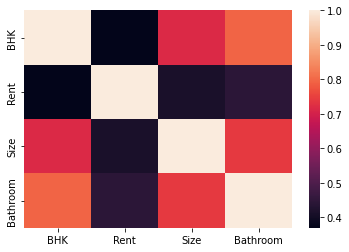

In [40]:
sb.heatmap(df.corr())